In [1]:
import yfinance as yf
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn

In [2]:
df = pd.read_csv("../data/NVDA_historical_data.csv")

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [5]:
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df['SMA50'] = df['Close'].rolling(window=50).mean()

In [6]:
df["RSI_14"] = talib.RSI(df["Close"], timeperiod=14)

In [7]:
df["MACD"], df["MACD_signal"], _ = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

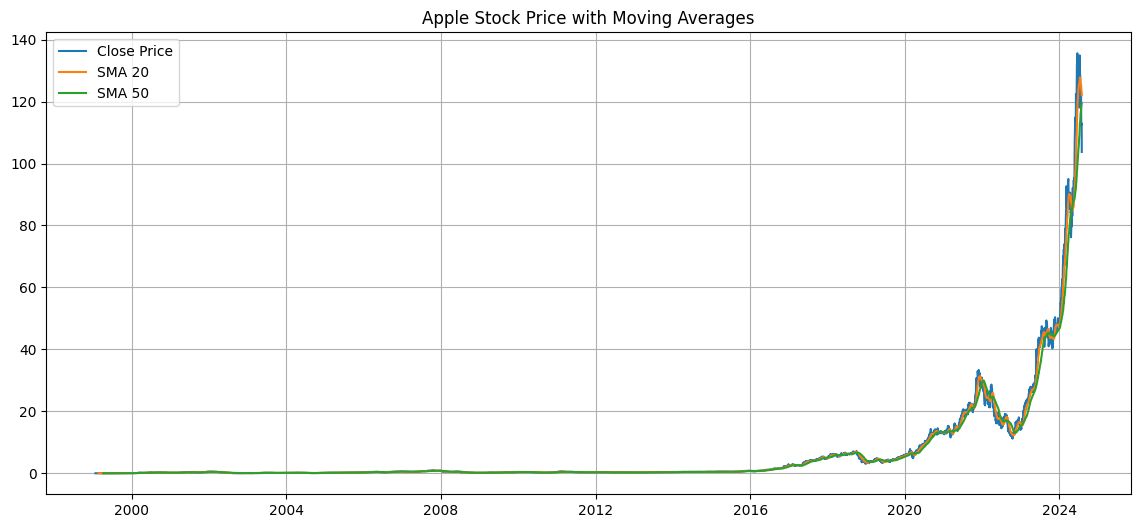

In [8]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA20'], label='SMA 20')
plt.plot(df['SMA50'], label='SMA 50')
plt.legend()
plt.title("Apple Stock Price with Moving Averages")
plt.grid(True)
plt.show()

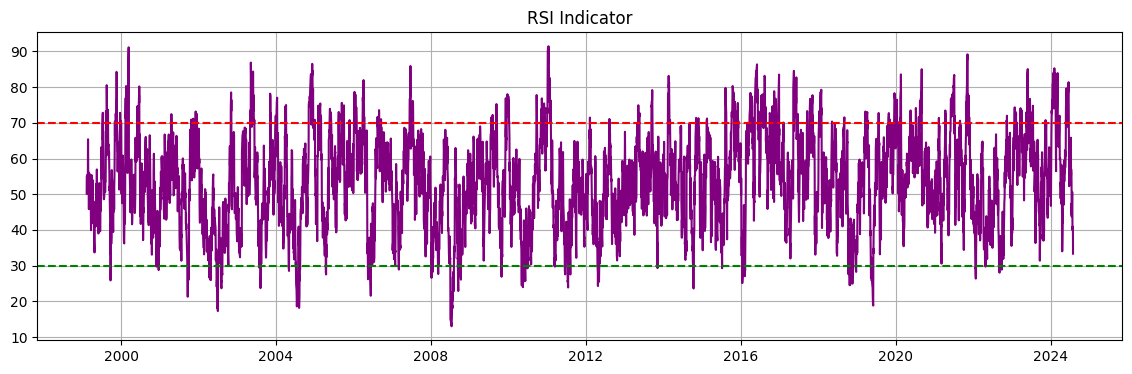

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title("RSI Indicator")
plt.grid(True)
plt.show()

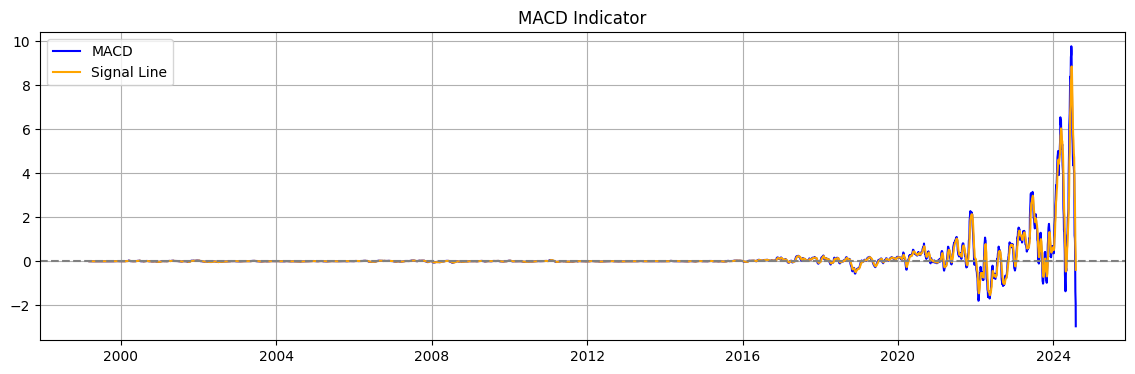

In [10]:
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.legend()
plt.title("MACD Indicator")
plt.grid(True)
plt.show()

In [11]:
import os
os.makedirs("data/technical", exist_ok=True)
df.to_csv("data/technical/NVDA_technical.csv", index=False)